In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Read in the data
SA_DV = pd.read_csv (r'Big12_Sex_Dating_Offenses.csv')
# Rename the columns to years
SA_DV.rename(columns={'2020 Total':'2020', '2021 Total':'2021','2022 Total':'2022'}, inplace=True)
# Melt the three year columns into one year column
SA_DV_melt = SA_DV.melt(id_vars=['School','Offense'], var_name='Year', value_name='Count').drop_duplicates()
# Pivot the Offenses to Columns
SA_DV_pivot = SA_DV_melt.pivot(index = ['School','Year'], columns=('Offense'), values='Count').reset_index()
# Create a new column specifying whether the universities are private and religious
SA_DV_pivot['Religious'] = np.where(SA_DV_pivot['School'].isin(['BU','TCU','BYU']), True, False)

In [3]:
# Make a list of the School names 
schools = ['BU', 'BU','BU','BYU', 'BYU','BYU','UCF','UCF','UCF','CU','CU','CU','UH','UH','UH','ISU','ISU','ISU',
           'KU','KU','KU','KSU','KSU','KSU','OU','OU','OU','OSU','OSU','OSU','UTA','UTA','UTA','TCU','TCU','TCU',
           'TTU','TTU','TTU','WV','WV','WV']
# Have each school have the years next to them
years = ['2020','2021','2022']
years = years * 14
# combine the two lists into a data frame
enrollment_df = pd.DataFrame({'School': schools, 'Year': years})
BU_enrollment = [19297, 20626, 20709]
BYU_enrollment = [36324, 34737, 34390]
UCF_enrollment = [71948, 70406, 68442]
UC_enrollment = [46798, 46710, 47914]
UH_enrollment = [47101, 47031, 46700]
ISU_enrollment = [31825, 30708, 29969]
KU_enrollment = [27619, 27685, 27638]
KSU_enrollment = [20854, 20229, 19722]
OU_enrollment = [30903, 31255, 31655]
OSU_enrollment = [24405, 24660, 24692]
UTA_enrollment = [50282, 51786, 52384]
TCU_enrollment = [11379, 11938, 12273]
TTU_enrollment = [40322, 40666, 40528]
WVU_enrollment = [26269, 25474, 27367]
# Add all the enrollment data to the data frame
enrollment_df['Enrollment'] = BU_enrollment + BYU_enrollment + UCF_enrollment + UC_enrollment + UH_enrollment + ISU_enrollment + KU_enrollment + KSU_enrollment + OU_enrollment + OSU_enrollment + UTA_enrollment + TCU_enrollment + TTU_enrollment + WVU_enrollment

# Merge the two data frames together
SA_DV_pivot = pd.merge(SA_DV_pivot, enrollment_df, on=['School','Year'])

In [4]:
# Make a new column called 'Potential Rape total' that is the rape value multiplied by 5
SA_DV_pivot['Potential Rape Total'] = SA_DV_pivot['Rape'] * 5
# Make a new column called 'Potential Fondling total' that is the fondling value multiplied by 2.5 rounded up
SA_DV_pivot['Potential Fondling Total'] = SA_DV_pivot['Fondling'] * 2.5
# Round up the 'Potential Fondling Total' column and make it a whole number
SA_DV_pivot['Potential Fondling Total'] = np.ceil(SA_DV_pivot['Potential Fondling Total'])

# Make a per capita calculation of all the crimes
SA_DV_pivot['Rape Per 10k'] = (SA_DV_pivot['Rape']/SA_DV_pivot['Enrollment'])*10000
SA_DV_pivot['Fondling Per 10k'] = (SA_DV_pivot['Fondling']/SA_DV_pivot['Enrollment'])*10000
SA_DV_pivot['Stalking Per 10k'] = (SA_DV_pivot['Stalking']/SA_DV_pivot['Enrollment'])*10000
SA_DV_pivot['Dating Violence Per 10k'] = (SA_DV_pivot['Dating Violence']/SA_DV_pivot['Enrollment'])*10000
SA_DV_pivot['Domestic Violence Per 10k'] = (SA_DV_pivot['Domestic Violence']/SA_DV_pivot['Enrollment'])*10000
SA_DV_pivot['Potential Rape Per 10k'] = (SA_DV_pivot['Potential Rape Total']/SA_DV_pivot['Enrollment'])*10000
SA_DV_pivot['Potential Fondling Per 10k'] = (SA_DV_pivot['Potential Fondling Total']/SA_DV_pivot['Enrollment'])*10000

# Save the data to a csv
#SA_DV_pivot.to_csv('SexOffensePlotData.csv', index=False)

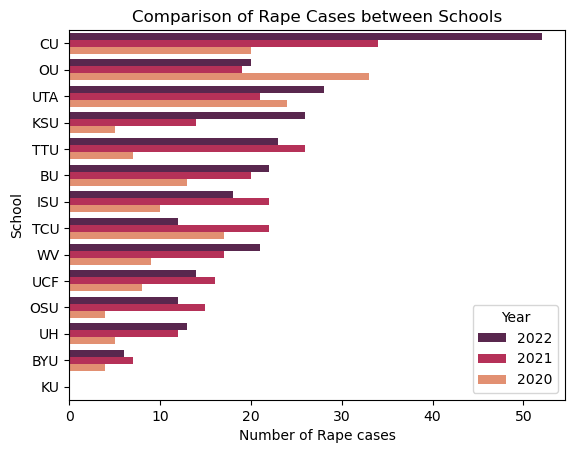

In [47]:
School_Rape = sns.barplot(x='Rape', y='School', data=SA_DV_pivot, hue='Year', palette='rocket', order=SA_DV_pivot.sort_values('Rape', ascending=False, inplace=True))
plt.xlabel('Number of Rape cases')
plt.ylabel('School')
plt.title('Comparison of Rape Cases between Schools')
# Save the Plot as a png
plt.savefig('School_Rape.png')
plt.show()

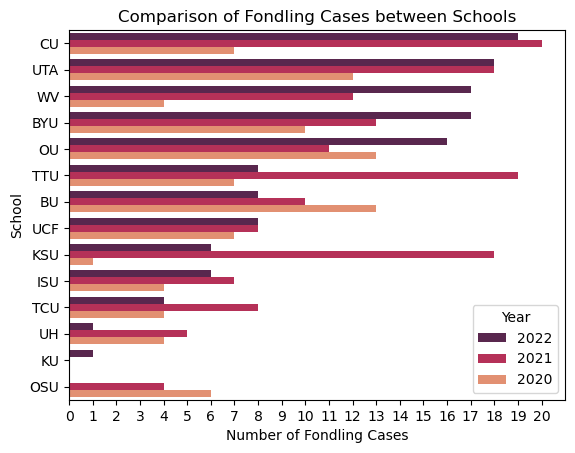

In [46]:
sns.barplot(x='Fondling', y='School', data=SA_DV_pivot, hue='Year', palette='rocket',order=SA_DV_pivot.sort_values(['Year','Fondling'], ascending=False, inplace=True))
plt.xticks(np.arange(0, 21, 1))
plt.xlabel('Number of Fondling Cases')
plt.ylabel('School')
plt.title('Comparison of Fondling Cases between Schools')
plt.savefig('School_Fondling.png')
plt.show()


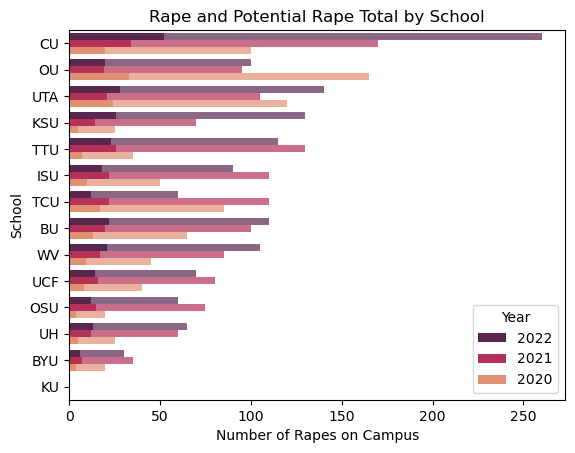

In [37]:
sns.barplot(y='School', x='Rape', data=SA_DV_pivot, hue='Year', palette='rocket',order=SA_DV_pivot.sort_values('Rape', ascending=False, inplace=True))
sns.barplot(y='School', x='Potential Rape Total', data=SA_DV_pivot, hue='Year', palette='rocket',  alpha=0.7, legend=False)
plt.xlabel('Number of Rapes on Campus')
#plt.ylabel('Count')
plt.title('Rape and Potential Rape Total by School')
plt.legend(title='Year')
# Get rid of the legend
#plt.gca().get_legend().remove()
plt.savefig('School_Rape_And_Potential.png')
plt.show()


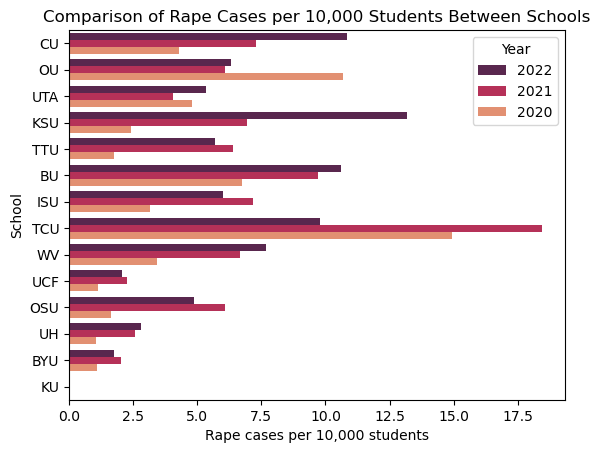

In [45]:
School_Rape_10k = sns.barplot(x='Rape Per 10k', y='School', data=SA_DV_pivot, hue='Year', palette='rocket', order=SA_DV_pivot.sort_values('Rape', ascending=False, inplace=True))
plt.xlabel('Rape cases per 10,000 students')
plt.ylabel('School')
plt.title('Comparison of Rape Cases per 10,000 Students Between Schools')

plt.savefig('School_Rape_Per_10k.png')
plt.show()

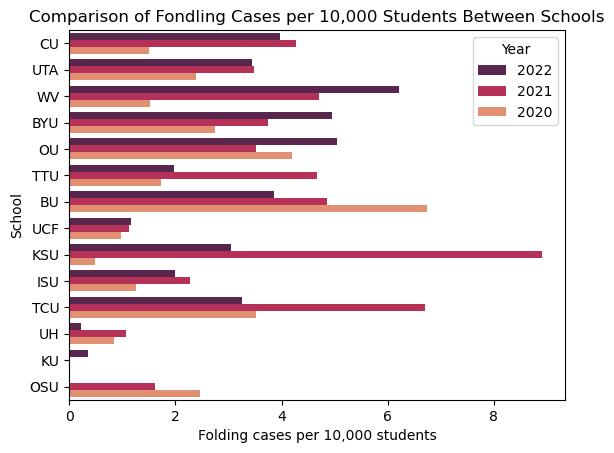

In [44]:
School_Fondling_10k = sns.barplot(x='Fondling Per 10k', y='School', data=SA_DV_pivot, hue='Year', palette='rocket', order=SA_DV_pivot.sort_values(['Year','Fondling'], ascending=False, inplace=True))
plt.xlabel('Folding cases per 10,000 students')
plt.ylabel('School')
plt.title('Comparison of Fondling Cases per 10,000 Students Between Schools')

plt.savefig('School_Fondling_Per_10k.png')
plt.show()


C:\Users\hermi\AppData\Local\Temp\ipykernel_504\1071679539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Religious', y='Rape', palette= 'rocket', data=SA_DV_pivot)


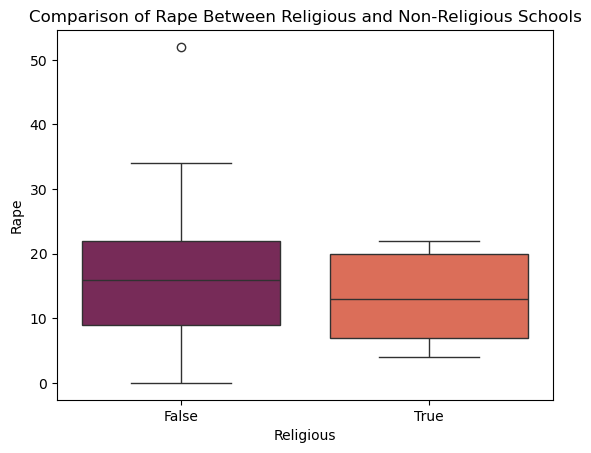

In [43]:
import seaborn as sns

# Group the data by Religious
grouped_data = SA_DV_pivot.groupby('Religious')

# Create a box plot comparing religious and non-religious schools
sns.boxplot(x='Religious', y='Rape', palette= 'rocket', data=SA_DV_pivot)
plt.xlabel('Religious')
plt.ylabel('Rape')
plt.title('Comparison of Rape Between Religious and Non-Religious Schools')

plt.savefig('Religious_Boxplot.png')
plt.show()


